## Chapter 3. Centrality, Power, and Bottlenecks

In this chapter, we'll explore the four most popular metrics. 

The first set of metrics that we approach is **centrality**

### Sample Data

We are going to perform a data gathering protocol called Snowball Sampling and obtain a dataset that is suitable for further analysis.

### Read Nodes and Edges from LiveJournal

We are going to use the LiveJournal data mining API to retrieve the data; we will use URLLib to fetch the data and parse it. LiveJournal exposes a simple text API; The function below fetches a list of friends from the API, walks through the lines in the response, and creates edges:

In [9]:
import networkx as nx
from urllib import request

def read_lj_friends(g, name):
    '''
    takes two arguments,
    g: graph object that the function will fill in with nodes and edges
    name: the username of the person whose friendship network should be searched
    '''
    # fetch the friend list from LiveJournal
    response = urllib.request.urlopen('http://www.livejournal.com/misc/fdata.bml?user='+name)
    
    # walk through the lines in the response and add each one as an edge in a network
    for line in response.readlines():
        # comments in the response start with a "#"
        if line.startswith(b'#'):
            continue 
         
        # make sure we don't have an empty line
        parts = line.split()
        
        if len(parts)==0:
            continue
        
        # add edge to the network
        if parts[0]=='<':
            g.add_edge(parts[1],name)
        else:
            g.add_edge(name,parts[1])

In [20]:
# generate graph object and call function
g= nx.Graph()
read_lj_friends(g, 'valerois')

In [11]:
# count the number of nodes returned
len(g)

299

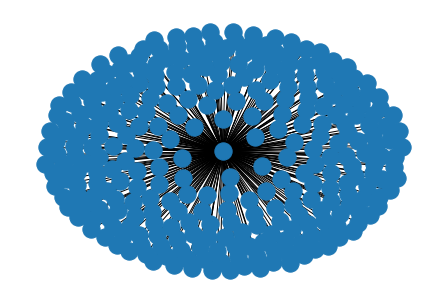

In [13]:
nx.draw(g)

### Snowball Sampling

Snowball sampling works like a pyramid scheme--data provided by each respondent is used to recruite new respondents, or:

* Start with a central node  
* Obtain friends of the central node  
* For every one of the friends: 
    * sample friends of the friends
    * For every friend of friend  
        * sample friends of friends of friends
        
This translates into a recursive routine, not entirely unlike the breadth-first search. Once concern with snowball sampling is the explosion of data that it can deliver. 

Another reason for limiting depth of search is a human limit of perception of social networks--known in the fireld as a **Horizon of Observability**

The procedure below is a Python implementation of a snowball sampling for LiveJournal. The function takes 2 required parameters--a network object into which new nodes and edges will be inserted, and name of a central node. The optional parameter `max_depth` is initially set at 1--this will just sample the immediate neighbors of the central node. Use it for testing--then increase to 2 or 3 to get a larger dataset:

In [16]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    print(center, current_depth, max_depth, taboo_list)
    
    if current_depth == max_depth:
        # if we have reached the depth limit of the search
        print("out of depth")
        return taboo_list
    
    if center in taboo_list:
        return taboo_list
    else: 
        taboo_list.append(center)
    
    read_lj_friends(g, center) # call LiveJournal API and get data for a node
    
    for node in g.neighbors(center):
        # Iterate through all friends of the central node, call snowball_sampling recursively
        taboo_list=snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
        
    return taboo_list

In [17]:
g=nx.Graph()
snowball_sampling(g, 'kozel_na_sakse')

kozel_na_sakse 0 1 []
b'cr' 1 1 ['kozel_na_sakse']
out of depth
b'saper' 1 1 ['kozel_na_sakse']
out of depth
b'ptfenix' 1 1 ['kozel_na_sakse']
out of depth
b'guy_gomel' 1 1 ['kozel_na_sakse']
out of depth
b'klari' 1 1 ['kozel_na_sakse']
out of depth
b'dachte' 1 1 ['kozel_na_sakse']
out of depth
b'solo_oboroten' 1 1 ['kozel_na_sakse']
out of depth
b'zina_korzina' 1 1 ['kozel_na_sakse']
out of depth
b'kirulya' 1 1 ['kozel_na_sakse']
out of depth
b'letchikleha' 1 1 ['kozel_na_sakse']
out of depth
b'usolt' 1 1 ['kozel_na_sakse']
out of depth
b'jolita' 1 1 ['kozel_na_sakse']
out of depth
b'periskop' 1 1 ['kozel_na_sakse']
out of depth
b'valerois' 1 1 ['kozel_na_sakse']
out of depth
b'to_to_i_ono_to' 1 1 ['kozel_na_sakse']
out of depth
b'cheese_people' 1 1 ['kozel_na_sakse']
out of depth
b'olga_mama' 1 1 ['kozel_na_sakse']
out of depth
b'gde_moi_mozgi' 1 1 ['kozel_na_sakse']
out of depth
b'tanyakotova' 1 1 ['kozel_na_sakse']
out of depth
b'sovarh' 1 1 ['kozel_na_sakse']
out of depth
b'oshest

['kozel_na_sakse']

### Saving and Loading a Sample Dataset from a File

Since data harvesting can take time--especially with snowball sampling--it's important to save the data. We will use a Pajek format--a simple text-based format that has been a lingua franca for exchanging network data:

`net.write_pajek(g, 'lj_friends.net)`  

Once the data has been saved, one can open this file in almost any other SNA package.

## Centrality

One of the first approaches of analyzing social networks is to measure power, influence, or other individual characteristics of people based on their connection patterns. 

### Degree Centrality in the LiveJournal network

**Degree Centrality** is the fraction of nodes it is connected to. 

We will find use the degree metric to find the core of the network. Degree is returned as a Python *map*--a set of name-value pairs linking node names to the degree value:

In [21]:
# compute degree

deg = nx.degree(g)
deg['valerois']

298

In [26]:
min(dict(deg).values())

1

In [27]:
max(dict(deg).values())

298

In [34]:
### This function returns a sorted degree list -- useful for celevrity-spotting

def sorted_map(map):
    ms = sorted(map.iteritems(), key=(lambda k,v: (-v,k)))
    return ms

ds = sorted_map(g)

AttributeError: 'Graph' object has no attribute 'iteritems'